In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
csv_files = [
    '../graft/summarizations/llama-3-8b-instruct/summarizations-llama-3-8b-instruct_batched_naip_0_250_grid.csv',
    '../graft/summarizations/llama-3-8b-instruct/summarizations-llama-3-8b-instruct_batched_naip_6_cont_grid.csv',
    '../graft/summarizations/llama-3-8b-instruct/summarizations-llama-3-8b-instruct_batched_naip_251_475_grid.csv'
]

# Load all CSV files into one DataFrame
df_list = []
for file in csv_files:
    df_chunk = pd.read_csv(file)
    df_list.append(df_chunk)

sum_csv = pd.concat(df_list, ignore_index=True)

In [10]:
image_id_column = 'SatelliteID'
def find_image_path(image_id):
    result = sum_csv[sum_csv[image_id_column].astype(str).str.contains(str(image_id), na=False)]
    if not result.empty:
        # print(f"Found image path for image ID {image_id}: {result[image_id_column].values[0]}")
        return result[image_id_column].values[0]  # Adjust if necessary
    else:
        print(f"Image path not found for image ID {image_id}")
        return None

In [18]:
import ast

def parse_labels(labels_string):
    # Convert the labels string to a dictionary
    labels_dict = ast.literal_eval(labels_string)
    return labels_dict

In [21]:
def display_entry(df, row_index):
    # Extract the specified row
    row = df.iloc[row_index]
    
    # Print instructions and labels
    print("Instructions:", row['instructions'])
    print("Labels:", row['labels'])
    
    labels = parse_labels(row['labels'])
    
    # Get image path using sat_id
    sat_id = row['sat_id']
    image_path = find_image_path(sat_id)
    
    # Plot the image
    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.title(f"Satellite ID: {sat_id}")
        plt.show()
        
        for label, boxes in labels.items():
            for box in boxes:
                # Extract box coordinates
                x_min, y_min, x_max, y_max = box
                width = x_max - x_min
                height = y_max - y_min
                
                # Scale the bounding box coordinates to the image dimensions
                img_width, img_height = image.size
                rect = Rectangle((x_min * img_width, y_min * img_height), 
                                 width * img_width, height * img_height,
                                 linewidth=2, edgecolor='red', facecolor='none')
                
                # Add the rectangle to the plot
                ax.add_patch(rect)
                # Add label text
                ax.text(x_min * img_width, y_min * img_height, label, color='white',
                        fontsize=8, verticalalignment='bottom', bbox=dict(facecolor='red', alpha=0.5))
        
        plt.show()
    except FileNotFoundError:
        print(f"Image file not found at {image_path}")
    except Exception as e:
        print(f"Error loading image: {e}")

In [ ]:
# complex reasoning
df1 = pd.read_csv('ins_gen_complex_reasoning.csv')
display_entry(df1, 0)

Instructions: 
        Question: Where is the highway located in the satellite image?
        === Answer: The highway runs horizontally across the bottom of the image, occupying the area defined by the bounding box [(0.0, 0.9978632478632479, 0.997867803837953, 0.0)], which suggests it runs through the forested area.

        Question: How does the highway relate to the surrounding natural elements?
        === Answer: The highway is surrounded by dense trees on both sides, highlighting its presence in a primarily natural environment while contributing to a serene and tranquil atmosphere.

        Question: What features can be inferred from the description of the area surrounding the highway?
        === Answer: The lack of visible human activity, such as cars or pedestrians, combined with the presence of a hillside and scattered trees, indicates a peaceful rural setting with a strong emphasis on the natural landscape.
Labels: highway: [(0.0, 0.9978632478632479, 0.997867803837953, 0.0)

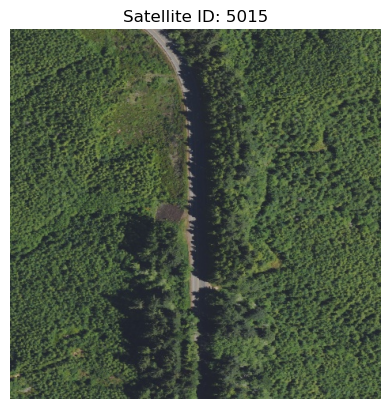

In [16]:
# location refernce
df2 = pd.read_csv('ins_gen_referring_pixel.csv')
display_entry(df2, 0)

Instructions: Description:
        The satellite image reveals a stunning natural landscape characterized by lush green hillsides and expansive forests, showcasing the idyllic beauty of rural Oregon. The hills are densely covered with trees, which contribute to the overall tranquil atmosphere of the region. Interspersed throughout the area are bodies of water, likely rivers or lakes, providing a scenic touch to the countryside. The serene and picturesque environment has a distinct absence of urban or industrial development, allowing nature to dominate the view. A highway runs along the edge of the image, indicating access to this beautiful natural setting while preserving the peaceful ambiance throughout the hills and forests.
Labels: highway: [(0.0, 0.9978632478632479, 0.997867803837953, 0.0)]


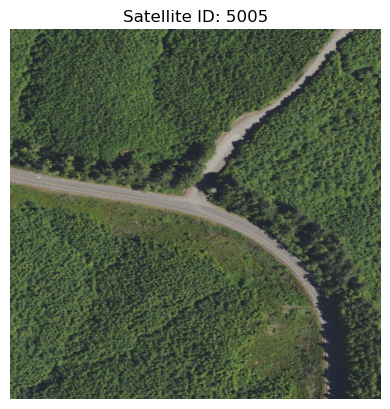

In [17]:
# detailed description
df3 = pd.read_csv('ins_gen_detailed_description.csv')
display_entry(df3, 0)